In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.feature_extraction.text import CountVectorizer
from scipy.stats import pearsonr


### We are using the dataset before bootstrapping to find the correlation between caption and `likes`, `comments`, `shares`, `impression` as if we were to bootstrap the data, there will not be any correlation anymore due to the randomness.

In [10]:
# Import data and drop unnecessary columns
captionDF = pd.read_csv("Datasets/cleaned-IG-data.csv", encoding="utf-8", sep=",")
captionDF = captionDF.drop('Unnamed: 0', axis=1)

In [11]:
captionDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Impressions         119 non-null    int64 
 1   Comments            119 non-null    int64 
 2   Shares              119 non-null    int64 
 3   Likes               119 non-null    int64 
 4   Caption             119 non-null    object
 5   Hashtags            119 non-null    object
 6   fullCaption         119 non-null    object
 7   Tokenized_Text      119 non-null    object
 8   Stemmed_Text        119 non-null    object
 9   tokenizedCaptions   119 non-null    object
 10  Tokenized_Hashtags  119 non-null    object
 11  Stemmed_Hashtags    119 non-null    object
 12  tokenizedHashtags   119 non-null    object
dtypes: int64(4), object(9)
memory usage: 12.2+ KB


### Finding Correlation of Captions and Likes/comments/shares/impressions

In [12]:
# Tokenizing captions and calculating correlation with metrics
vectorizer = CountVectorizer()
document_term_matrix = vectorizer.fit_transform(captionDF['tokenizedCaptions'])
word_freq_df = pd.DataFrame(document_term_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Add engagement metrics to word frequency DataFrame
word_freq_df['Impressions'] = captionDF['Impressions']
word_freq_df['Comments'] = captionDF['Comments']
word_freq_df['Shares'] = captionDF['Shares']
word_freq_df['Likes'] = captionDF['Likes']

# Calculate correlations and store in a dictionary
correlations = {}
for word in vectorizer.get_feature_names_out():
    correlations[word] = {
        'Impressions': pearsonr(word_freq_df[word], word_freq_df['Impressions'])[0],
        'Comments': pearsonr(word_freq_df[word], word_freq_df['Comments'])[0],
        'Shares': pearsonr(word_freq_df[word], word_freq_df['Shares'])[0],
        'Likes': pearsonr(word_freq_df[word], word_freq_df['Likes'])[0]
    }


# Print the correlations
for word, corr in correlations.items():
    print(f"Word: {word}")
    print(f"  Impressions Correlation: {corr['Impressions']}")
    print(f"  Comments Correlation: {corr['Comments']}")
    print(f"  Shares Correlation: {corr['Shares']}")
    print(f"  Likes Correlation: {corr['Likes']}\n")


Word: account
  Impressions Correlation: 0.029143954578918843
  Comments Correlation: 0.0348479542919285
  Shares Correlation: -0.058288577397454966
  Likes Correlation: -0.0031214492013159545

Word: accuraci
  Impressions Correlation: -0.052733502590500456
  Comments Correlation: -0.12163908573597683
  Shares Correlation: -0.07661444453166141
  Likes Correlation: -0.0839207747507876

Word: activ
  Impressions Correlation: -0.033037107299395393
  Comments Correlation: -0.09555791239799262
  Shares Correlation: -0.049125643830351735
  Likes Correlation: -0.09289847758961779

Word: ai
  Impressions Correlation: -0.028899391613430137
  Comments Correlation: -0.08650093209906448
  Shares Correlation: -0.02343032311466757
  Likes Correlation: -0.019589884516968997

Word: alexnet
  Impressions Correlation: -0.06653243068688511
  Comments Correlation: -0.017314392384039937
  Shares Correlation: -0.05828857739745496
  Likes Correlation: -0.10412060613815552

Word: algorithm
  Impressions Corre

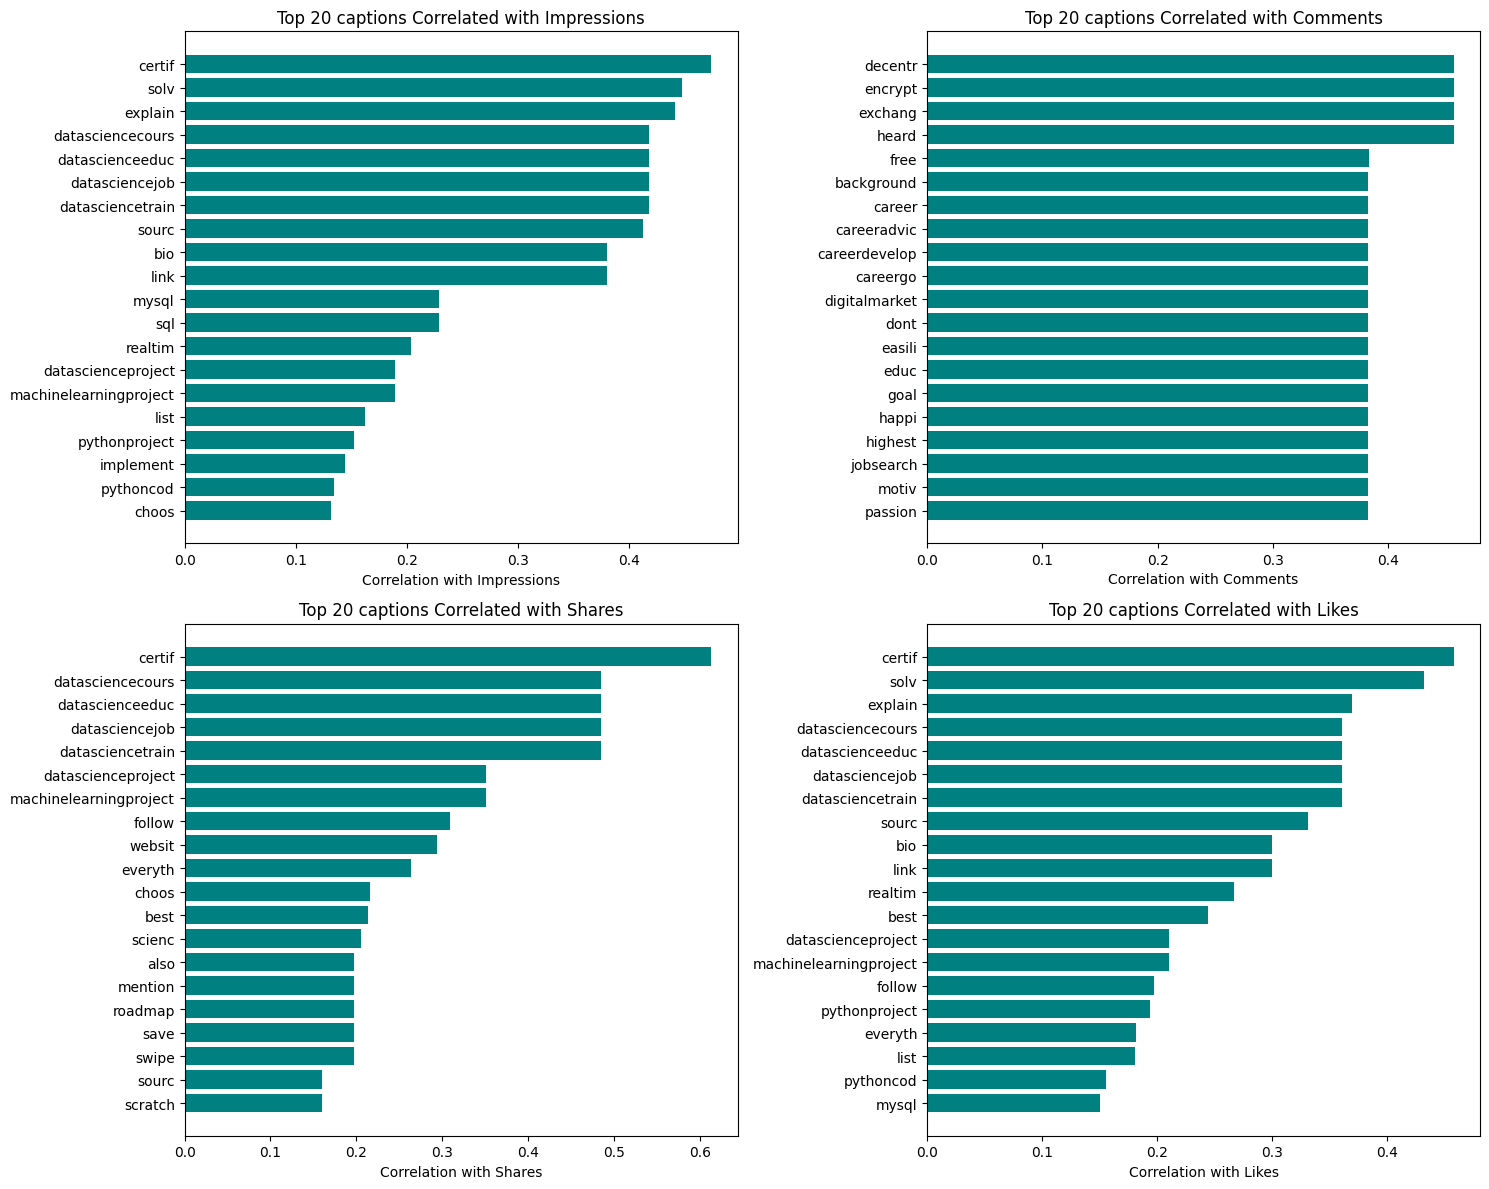

In [13]:
# Function to plot top 20 words for each metric in a subplot
def plot_top_20_words_in_subplot(ax, correlations, metric, data_type):
    # Sort words by correlation with the specified metric
    sorted_words = sorted(correlations.items(), key=lambda x: x[1][metric], reverse=True)
    
    # Extract top 20 words and their correlations
    top_20_words = [word[0] for word in sorted_words[:20]]
    top_20_correlations = [word[1][metric] for word in sorted_words[:20]]
    
    # Plot horizontal bar chart
    ax.barh(top_20_words, top_20_correlations, color='teal')
    ax.set_xlabel(f'Correlation with {metric}')
    ax.set_title(f'Top 20 {data_type} Correlated with {metric}')
    ax.invert_yaxis()

# Create a figure with 4 subplots (2 rows, 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Plot the top 20 words for each metric in each subplot
plot_top_20_words_in_subplot(axs[0, 0], correlations, 'Impressions', 'captions')
plot_top_20_words_in_subplot(axs[0, 1], correlations, 'Comments', 'captions')
plot_top_20_words_in_subplot(axs[1, 0], correlations, 'Shares', 'captions')
plot_top_20_words_in_subplot(axs[1, 1], correlations, 'Likes', 'captions')

# Adjust layout to prevent overlap and display the figure
plt.tight_layout()
plt.show()


### Finding Correlation of Caption words and Likes/comments/shares/impressions

In [14]:
# Create an instance of CountVectorizer
vectorizer = CountVectorizer()
# Convert the tokenized captions directly into a document-term matrix
document_term_matrix = vectorizer.fit_transform(captionDF['tokenizedHashtags'])

# Convert the matrix to a DataFrame
word_freq_df = pd.DataFrame(document_term_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Add the columns Impressions, Comments, Shares, and Likes to the word_freq_df DataFrame
word_freq_df['Impressions'] = captionDF['Impressions']
word_freq_df['Comments'] = captionDF['Comments']
word_freq_df['Shares'] = captionDF['Shares']
word_freq_df['Likes'] = captionDF['Likes']

# Calculate the correlation between each word and Impressions, Comments, Shares, Likes
correlations = {}

for word in vectorizer.get_feature_names_out():
    correlations[word] = {
        'Impressions': pearsonr(word_freq_df[word], word_freq_df['Impressions'])[0],
        'Comments': pearsonr(word_freq_df[word], word_freq_df['Comments'])[0],
        'Shares': pearsonr(word_freq_df[word], word_freq_df['Shares'])[0],
        'Likes': pearsonr(word_freq_df[word], word_freq_df['Likes'])[0]
    }

# Print the correlations
for word, corr in correlations.items():
    print(f"Word: {word}")
    print(f"  Impressions Correlation: {corr['Impressions']}")
    print(f"  Comments Correlation: {corr['Comments']}")
    print(f"  Shares Correlation: {corr['Shares']}")
    print(f"  Likes Correlation: {corr['Likes']}\n")


Word: ai
  Impressions Correlation: -0.028899391613430137
  Comments Correlation: -0.08650093209906448
  Shares Correlation: -0.02343032311466757
  Likes Correlation: -0.019589884516968997

Word: alexnet
  Impressions Correlation: -0.06653243068688511
  Comments Correlation: -0.017314392384039937
  Shares Correlation: -0.05828857739745496
  Likes Correlation: -0.10412060613815552

Word: algorithm
  Impressions Correlation: 0.039225804610898404
  Comments Correlation: -0.035790248285783186
  Shares Correlation: -0.14947861538267151
  Likes Correlation: 0.01974615261864864

Word: amankharw
  Impressions Correlation: 0.06504132174648543
  Comments Correlation: 0.043111487530633465
  Shares Correlation: 0.05675681350971864
  Likes Correlation: 0.10324984160808273

Word: amazonfind
  Impressions Correlation: -0.07288859350688036
  Comments Correlation: 0.16061752755095207
  Shares Correlation: -0.06977041814874853
  Likes Correlation: -0.13034472156309002

Word: analysi
  Impressions Correl

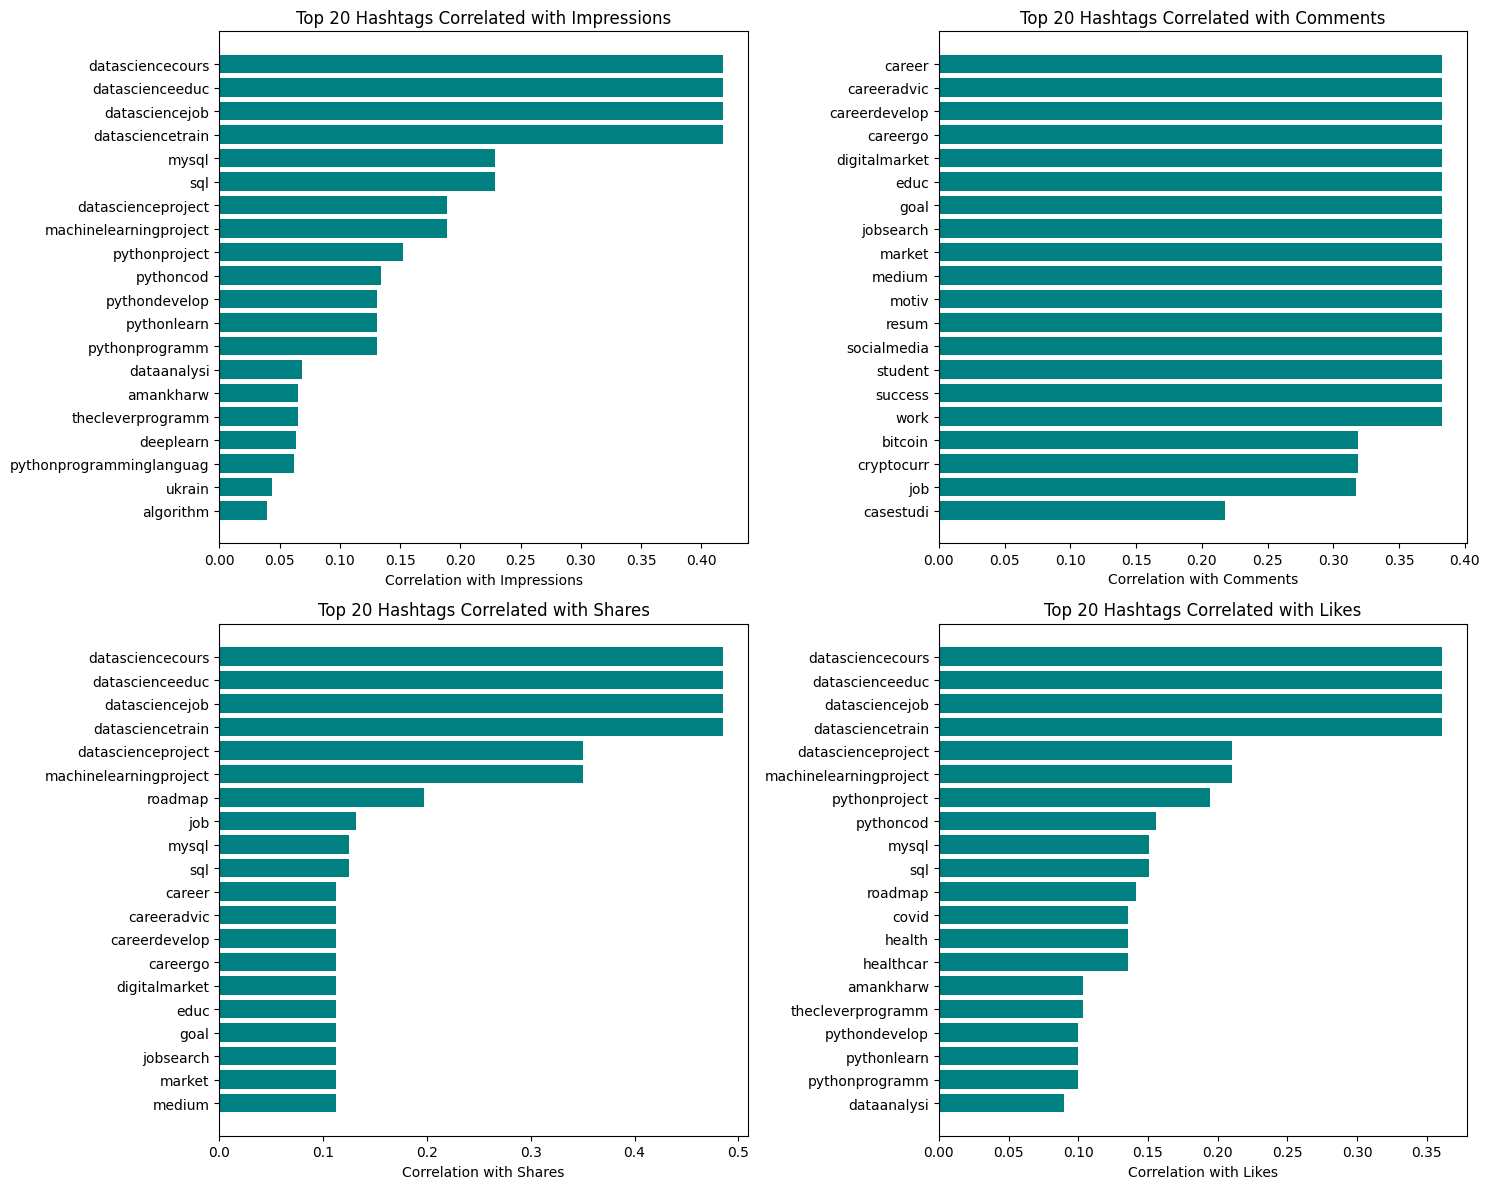

In [15]:
# Create a figure with 4 subplots (2 rows, 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Plot the top 20 words for each metric in each subplot
plot_top_20_words_in_subplot(axs[0, 0], correlations, 'Impressions','Hashtags')
plot_top_20_words_in_subplot(axs[0, 1], correlations, 'Comments','Hashtags')
plot_top_20_words_in_subplot(axs[1, 0], correlations, 'Shares','Hashtags')
plot_top_20_words_in_subplot(axs[1, 1], correlations, 'Likes','Hashtags')

# Adjust layout to prevent overlap and display the figure
plt.tight_layout()
plt.show()


### Conclusion

Based on the analysis, the top words and hashtags that correlate most strongly with impressions, likes, comments, and shares are as follows:

- **Top Captions for Impressions**: [list top words]
- **Top Captions for Likes**: [list top words]
- **Top Captions for Comments**: [list top words]
- **Top Captions for Shares**: [list top words]

These words and hashtags can be leveraged to enhance engagement with the target audience.


### Conclusion: 
##### The captions & hashtag that can bring about the most impressions and likes/commets/shares are: